In [1]:
#import libraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import spacy
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /Users/henry/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/henry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
data = pd.DataFrame(pd.read_csv('Twitter Sentiment/cleaned_text.csv'))

def helper(string):
    temp = []
    for word in string[1:-1].split(','):
        word = word.strip()
        word = word[1:-1]
        if word:
          temp.append(word)  
    return temp
data.filtered_tokens = data.filtered_tokens.apply(helper)

In [7]:
# One hot encoding
categories = list(set([item for sublist in data.filtered_tokens for item in sublist]))
#print(categories)

vectorizer = CountVectorizer(binary=True, vocabulary=categories)
sentences = [' '.join(words) for words in data['filtered_tokens']]

# Fit and transform the sentences
one_hot_encoded = vectorizer.fit_transform(sentences)

# Convert the one-hot encoded data to a DataFrame
encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns = categories)

# use the print function to check if the one hot encoding is correct
#print(encoded_df.iloc[954,:].sum(),sentences[954]) 
print(encoded_df)
#print(categories)


       slik  laughed  copland  curze  mummy  songfest  alexandrine  geezer  \
0         0        0        0      0      0         0            0       0   
1         0        0        0      0      0         0            0       0   
2         0        0        0      0      0         0            0       0   
3         0        0        0      0      0         0            0       0   
4         0        0        0      0      0         0            0       0   
...     ...      ...      ...    ...    ...       ...          ...     ...   
99995     0        0        0      0      0         0            0       0   
99996     0        0        0      0      0         0            0       0   
99997     0        0        0      0      0         0            0       0   
99998     0        0        0      0      0         0            0       0   
99999     0        0        0      0      0         0            0       0   

       stickers  hein  ...  detract  rap  overcooks  awwhhh  ho

In [8]:
data = data.iloc[25000:75000]
encoded_df = encoded_df.iloc[25000:75000]

print(data.shape)
print(encoded_df.shape)

(50000, 8)
(50000, 50661)


In [9]:
from sklearn.decomposition import PCA

# Create a PCA instance
pca = PCA(n_components=4)

# Fit and transform your one-hot encoded data
reduced_data = pca.fit_transform(encoded_df)

explained_variance = pca.explained_variance_ratio_



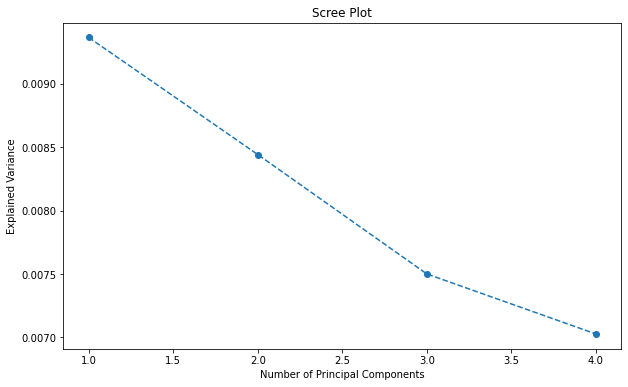

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 4 + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.show()


In [15]:
print(reduced_data.shape)
print(data['labels'].shape)

(50000, 4)
(50000,)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reduced_data, data['labels'], test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# You can also print a classification report for more details
print(classification_report(y_test, y_pred))


Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.62      0.63      0.63      5022
           1       0.62      0.62      0.62      4978

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000

